100%|██████████| 1999639040/1999639040 [02:22<00:00, 14036223.91it/s]


Extracting ./VOCdevkit/VOCtrainval_11-May-2012.tar to ./VOCdevkit


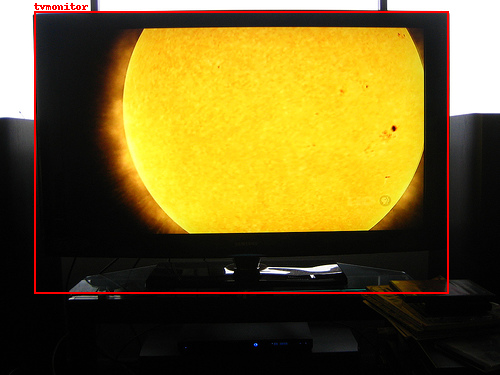

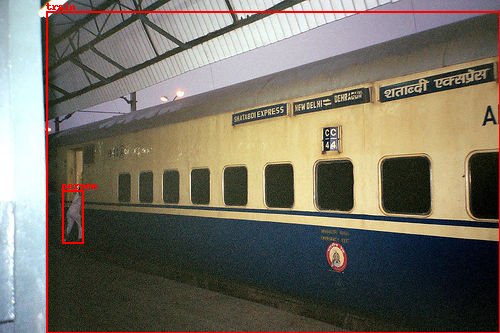

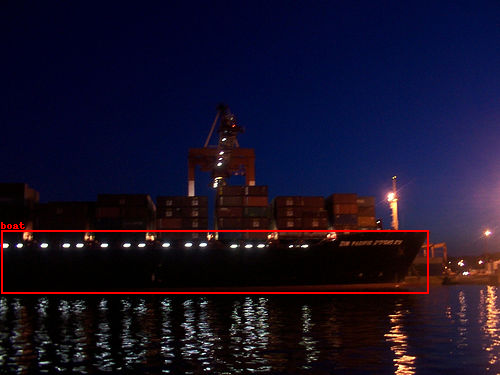

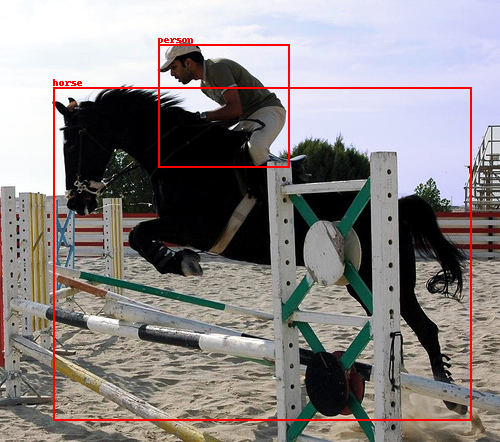

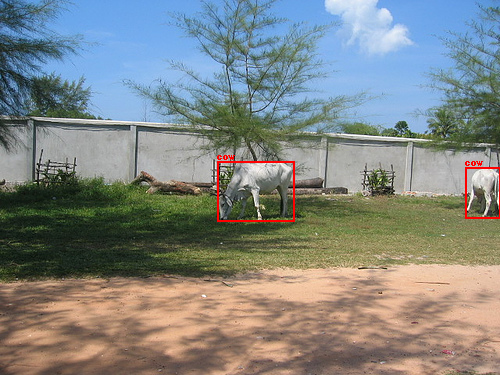

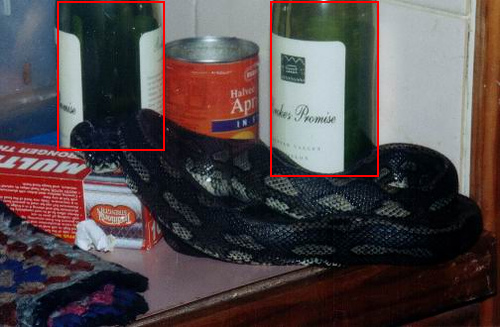

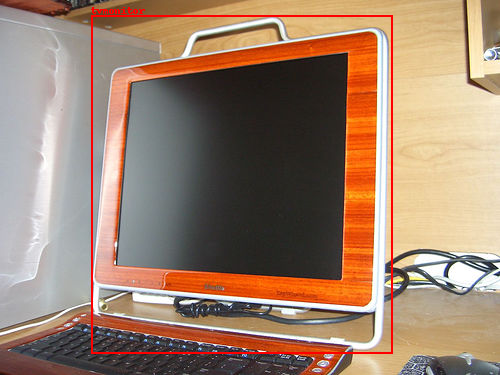

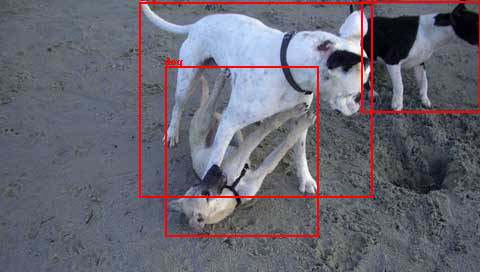

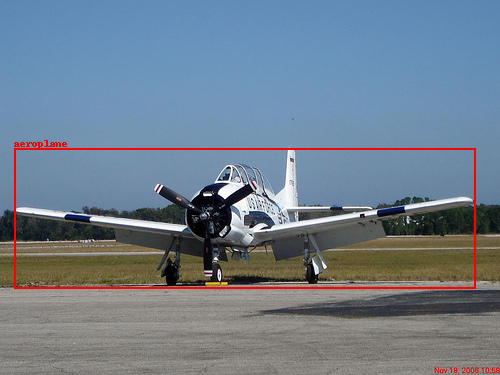

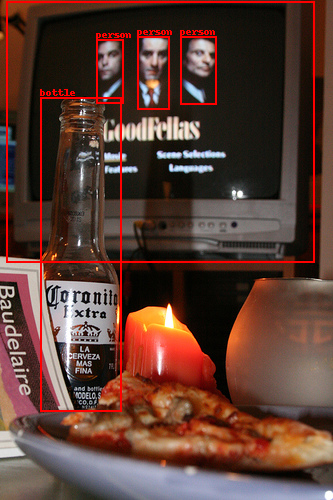

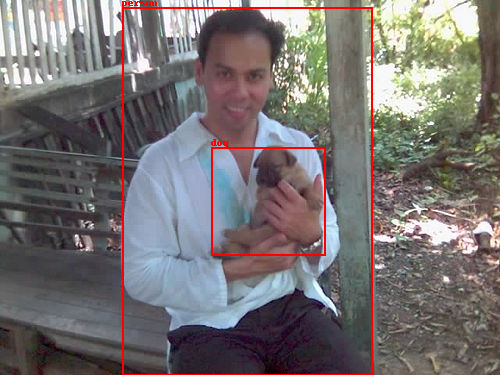

In [ ]:
import torch
import cv2
import torchvision
from torchvision.transforms import ToTensor
from PIL import Image, ImageDraw
import numpy as np


# Load pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load PASCAL VOC dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((24, 24)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor()
])

def detect_faces(image):
    # Convert PIL Image to OpenCV format
    cv_image = np.array(image)
    cv_image = cv2.cvtColor(cv_image, cv2.COLOR_RGB2BGR)

    # Detect faces using Viola-Jones algorithm
    gray_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Convert bounding boxes to (x, y, w, h) format
    face_boxes = []
    for (x, y, w, h) in faces:
        face_boxes.append((x, y, x + w, y + h))

    return face_boxes

def main():
    # Load PASCAL VOC dataset



    dataset = torchvision.datasets.VOCDetection(root='./VOCdevkit', year='2012', image_set='trainval',
                                                download=True)

    for i in range(len(dataset)):
        image, target = dataset.__getitem__(i)
        image = image.convert('RGB')
        face_boxes = detect_faces(image)

        # Draw bounding boxes and labels on the image
        draw = ImageDraw.Draw(image)
        if isinstance(target['annotation']['object'], list):
            objects = target['annotation']['object']
        else:
            objects = [target['annotation']['object']]
        for obj in objects:
            name = obj['name']
            bbox = obj['bndbox']
            x1, y1, x2, y2 = int(bbox['xmin']), int(bbox['ymin']), int(bbox['xmax']), int(bbox['ymax'])
            draw.rectangle([(x1, y1), (x2, y2)], outline='red', width=2)
            draw.text((x1, y1 - 10), name, fill='red')

        # Display the image
        image.show()

if __name__ == '__main__':
    main()
